# Escuela Organización Industrial. 
### Plantilla de Entregas de Prácticas
---
*Consejos de uso de Google Colab:*

*   Puedes consultar la documentación sobre una función escribiendo **?** justo después de una función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

---


### 📣 Adjunta en cada bloque correspondiente el código de cada una de las prácticas evaluables, **de modo que pueda ser fácilmente ejecutado** para así poder comprobar su correcto funcionamiento.

💻 **Google Colab** es una herramienta que te permite ejecutar cuadernos Jupyter en la nube. Es decir, una herramienta a tu alcance desde cualquier dispositivo con el que poder programar en Python, teniendo todas las librerías más utilizadas del campo del Data Science y el Machine Learning y el hardware facilitado por Google de manera gratuita.

# Programming a Convolutional Autoencoder


<center><img src="https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@15234372844108/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png" alt="Drawing" width="600px"/></center>


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt

# Cargamos el dataset MNIST.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

# Separamos las etiquetas de las imágenes
X = mnist[:, 1:]
Y = mnist[:, 0:1]

# Escalamos los datos y codificamos con One-Hot Encoding el output.
Xn = X / 255
Yn = to_categorical(Y)

# Usamos el divisor de datos de Sklearn para train/test
from sklearn.model_selection import train_test_split

# Partición train/test split para supervisar el overfitting.
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size=0.3)

In [ ]:
size = 28 # Tamaño de la imagen.

z = 10 # Tamaño del vector intermedio del autoencoder (vector latente).

# Primero creamos el input para el encoder.
inputEncoder=Input(shape=(size,size,1))

# Creamos las capas convolucionales del encoder 
capa1=Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(inputEncoder)
capa2=Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(capa1)
capa3=Conv2D(filters=128, kernel_size=3, strides=2, padding='valid', activation='relu')(capa2)

# Convertimos todo a un vector plano
capa4=Flatten()(capa3)  

# Convertimos mediante una capa densa el vector plano a uno con solo 10 salidas
Dense1=Dense(z)(capa4)

In [ ]:
# #Para visualización que se cumple con el diagrama
# encoder=Model(inputEncoder, Dense1, name="encoder")
# print(encoder.summary())

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 10)                11530     
                                                                 
Total params: 104,202
Trainable params: 104,202
Non-trainab

In [ ]:
# Creamos el input para el decoder.
inputDecoder=Input(shape=z)

# Creamos las capas del decoder 
Dense2=Dense(1152)(inputDecoder)
r= Reshape((3,3,128))(Dense2)     
capa1=Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='valid', activation='relu')(r)
capa2=Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(capa1)
capa3=Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same', activation='relu')(capa2)


In [ ]:
# #Para visualización que se cumple con el diagrama
# decoder=Model(inputDecoder, capa3, name="decoder")
# print(decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 1152)              12672     
                                                                 
 reshape (Reshape)           (None, 3, 3, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 64)         73792     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

In [ ]:
# Se crean los modelos del encoder y decoder por separado
encoder = Model(inputs=inputEncoder, outputs=Dense1)
decoder = Model(inputs=inputDecoder, outputs=capa3)

In [ ]:
#Unimos el encoder con el decoder para formar el autoencoder
cabezaAutoencoder = encoder(inputEncoder)
cuerpoAutoencoder = decoder(cabezaAutoencoder)

autoencoder = Model(inputs=inputEncoder, outputs=cuerpoAutoencoder)

In [ ]:
#Compilamos y entrenamos 
autoencoder.compile(optimizer="Adam", loss='mse')

autoencoder.fit(X_train.reshape(-1, size, size, 1), 
                X_train.reshape(-1, size, size, 1),
                validation_data=(X_test.reshape(-1, size, size, 1), 
                                 X_test.reshape(-1, size, size, 1)),
                epochs=50,
                batch_size=128)

Epoch 1/50
110/110 [==============================] - 12s 98ms/step - loss: 0.0601 - val_loss: 0.0348
Epoch 2/50
110/110 [==============================] - 10s 95ms/step - loss: 0.0277 - val_loss: 0.0240
Epoch 3/50
110/110 [==============================] - 10s 95ms/step - loss: 0.0223 - val_loss: 0.0210
Epoch 4/50
110/110 [==============================] - 11s 104ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 5/50
110/110 [==============================] - 10s 95ms/step - loss: 0.0189 - val_loss: 0.0189
Epoch 6/50
110/110 [==============================] - 13s 123ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 7/50
110/110 [==============================] - 11s 101ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 8/50
110/110 [==============================] - 10s 95ms/step - loss: 0.0169 - val_loss: 0.0171
Epoch 9/50
110/110 [==============================] - 12s 112ms/step - loss: 0.0165 - val_loss: 0.0168
Epoch 10/50
110/110 [==============================] - 10s 95ms/step - loss: 0

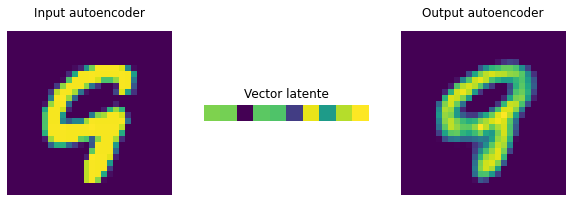

In [ ]:
#Visualización de imágenes con matplotlib


fig, axs = plt.subplots(1, 3, figsize=(10, 10))

inputImage = X_test[np.random.randint(1, 100)].reshape(1, 28, 28, 1)

# Input del autoencoder.
fig.axes[0].matshow(inputImage[0, :, :, 0])
fig.axes[0].set_title("Input autoencoder")
fig.axes[0].axis("off")

# Llamamos al autoencoder.
outputImage = autoencoder.predict(inputImage)

# Obtengo el vector latente.
zVec = encoder.predict(inputImage)

fig.axes[1].matshow(zVec)
fig.axes[1].set_title("Vector latente")
fig.axes[1].axis("off")

# Output del autoencoder.
fig.axes[2].matshow(outputImage[0, :, :, 0])
fig.axes[2].set_title("Output autoencoder")
fig.axes[2].axis("off")

plt.show()

# Programming a Convolutional Autoencoder 2

<center><img src="https://i.imgur.com/zdprNMz.png" alt="Drawing" width="600px"/></center>

## **Autoencoder Denoiser**

Genera una imagen con ruido y comprueba que tu modelo es capaz de eliminarlo. Después, vuelve a entrenar al Autoencoder, pero esta vez añadiendo ruido al *input* y no al output con las función del ImageDataGenerator que os proporciono y entrena a tu ***autoencoder*** para comprobar si tu modelo mejora su capacidad de actuar como un *denoiser*.

In [ ]:
# Creamos un método que añada ruido
# a las imágenes dadas como input.

def add_noise(img, noise_factor=0.5):
  # Creo la máscara de ruido.
  noise = (np.random.rand(28, 28, 1) * 2 - 1) * noise_factor
  # Limito los resultados al rango 0-1
  return np.clip(img + noise, 0, 1)

def noise_200(img):
  return add_noise(img, noise_factor=2) #volviéndonos locos :)

def noise_100(img):
  return add_noise(img, noise_factor=1)

def noise_75(img):
  return add_noise(img, noise_factor=0.75)

def noise_50(img):
  return add_noise(img, noise_factor=0.5)
  
def noise_25(img):
  return add_noise(img, noise_factor=0.25)


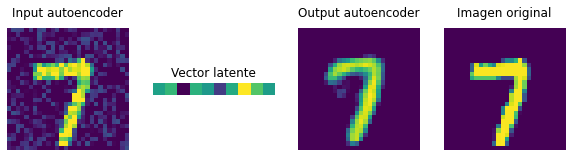

In [ ]:
#Visualización de imágenes con matplotlib

#Se configura la cantidad de gráficos y el tamaño
fig, axs = plt.subplots(1, 4, figsize=(10, 10))

# Se selecciona una imagen aleatoria del dataset para usarla como entrada
inputImage = X_test[np.random.randint(1, 100)].reshape(1, 28, 28, 1)

# Se le aplica ruido a la imagen seleccionada
inputNoisyImage=noise_25(inputImage)

# Input del autoencoder.
fig.axes[0].matshow(inputNoisyImage[0, :, :, 0])#Imagen con ruido
fig.axes[0].set_title("Input autoencoder")
fig.axes[0].axis("off")

# Llamamos al autoencoder.
outputImage = autoencoder.predict(inputNoisyImage)#Imagen con ruido

# Obtengo el vector latente.
zVec = encoder.predict(inputNoisyImage)#Imagen con ruido

fig.axes[1].matshow(zVec)
fig.axes[1].set_title("Vector latente")
fig.axes[1].axis("off")

# Output del autoencoder.
fig.axes[2].matshow(outputImage[0, :, :, 0])
fig.axes[2].set_title("Output autoencoder")
fig.axes[2].axis("off")

#Imagen original.
fig.axes[3].matshow(inputImage[0, :, :, 0])
fig.axes[3].set_title("Imagen original")
fig.axes[3].axis("off")

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Entrenamos el autoencoder para que aprenda a quitar el ruido más eficientemente

# Generador de ruido.
noise_gen = ImageDataGenerator(preprocessing_function=noise_200).flow(X_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1))

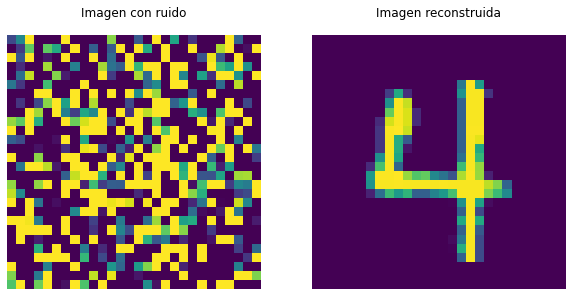

In [ ]:
from IPython.core.pylabtools import figsize
# Recibo imágenes del generador.
batchX, batchY = next(noise_gen)

# Visualizamos las imágenes.
fig, axs = plt.subplots(1,2, figsize=(10,10))
fig.axes[0].matshow(batchX[0, :, :, 0])
fig.axes[0].set_title("Imagen con ruido")
fig.axes[0].axis("off")
fig.axes[1].matshow(batchY[0, :, :, 0])
fig.axes[1].set_title("Imagen reconstruida")
fig.axes[1].axis("off")
plt.show()

In [ ]:
autoencoder.fit(noise_gen, epochs=50)

Epoch 1/50
438/438 [==============================] - 15s 33ms/step - loss: 0.0555
Epoch 2/50
438/438 [==============================] - 13s 29ms/step - loss: 0.0493
Epoch 3/50
438/438 [==============================] - 12s 28ms/step - loss: 0.0483
Epoch 4/50
438/438 [==============================] - 13s 29ms/step - loss: 0.0476
Epoch 5/50
438/438 [==============================] - 13s 30ms/step - loss: 0.0472
Epoch 6/50
438/438 [==============================] - 13s 29ms/step - loss: 0.0471
Epoch 7/50
438/438 [==============================] - 13s 29ms/step - loss: 0.0468
Epoch 8/50
438/438 [==============================] - 12s 28ms/step - loss: 0.0467
Epoch 9/50
438/438 [==============================] - 12s 28ms/step - loss: 0.0466
Epoch 10/50
438/438 [==============================] - 13s 29ms/step - loss: 0.0464
Epoch 11/50
438/438 [==============================] - 12s 28ms/step - loss: 0.0463
Epoch 12/50
438/438 [==============================] - 13s 29ms/step - loss: 0.0463
E

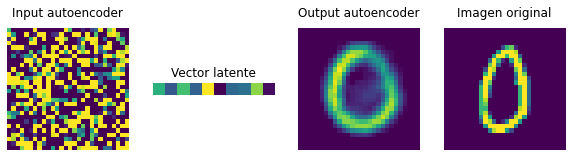

In [ ]:
#Se configura la cantidad de gráficos y el tamaño
fig, axs = plt.subplots(1, 4, figsize=(10, 10))

# Se selecciona una imagen aleatoria del dataset para usarla como entrada
inputImage = X_test[np.random.randint(1, 100)].reshape(1, 28, 28, 1)

# Se le aplica ruido a la imagen seleccionada
inputNoisyImage=noise_200(inputImage)

# Input del autoencoder.
fig.axes[0].matshow(inputNoisyImage[0, :, :, 0])#Imagen con ruido
fig.axes[0].set_title("Input autoencoder")
fig.axes[0].axis("off")

# Llamamos al autoencoder.
outputImage = autoencoder.predict(inputNoisyImage)#Imagen con ruido

# Obtengo el vector latente.
zVec = encoder.predict(inputNoisyImage)#Imagen con ruido

fig.axes[1].matshow(zVec)
fig.axes[1].set_title("Vector latente")
fig.axes[1].axis("off")

# Output del autoencoder.
fig.axes[2].matshow(outputImage[0, :, :, 0])
fig.axes[2].set_title("Output autoencoder")
fig.axes[2].axis("off")

#Imagen original.
fig.axes[3].matshow(inputImage[0, :, :, 0])
fig.axes[3].set_title("Imagen original")
fig.axes[3].axis("off")

plt.show()

##**Interpolaciones**

Genera vectores latentes para dos tipos de imágenes y visualízalas. Después haz la interpolación matemática entre los dos vectores, para diferentes grados de mezcla, y con los vectores resultantes, reconstruye las imágenes con el *Decoder()*. ¿Se produce algún tipo de interpolación? ¿Se te ocurre otro tipo de red que pudiera generar interpolaciones de mejor calidad?

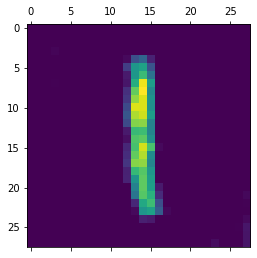

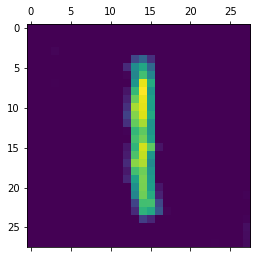

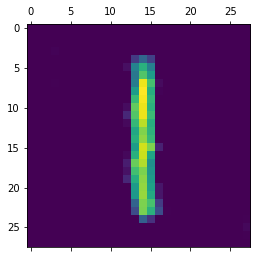

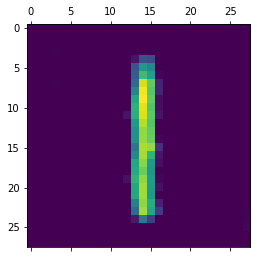

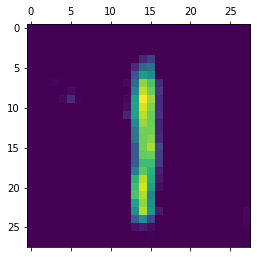

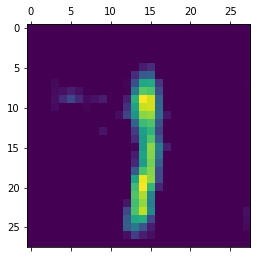

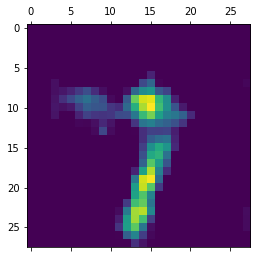

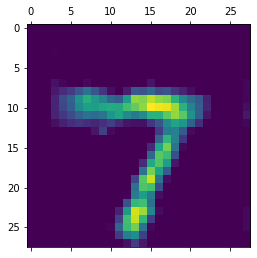

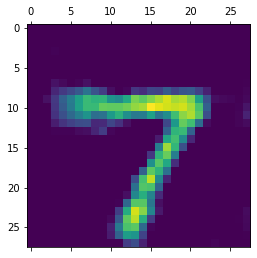

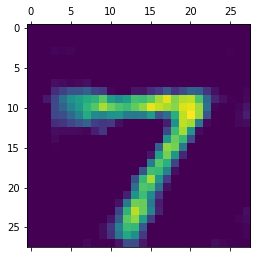

In [ ]:
# Utilizamos dos imágenes aleatorias de nuestro dataset
Image1 = X_test[np.random.randint(1, 100)].reshape(1, 28, 28, 1)
Image2 = X_test[np.random.randint(1, 100)].reshape(1, 28, 28, 1)

# Generamos sus vectores latentes pasándolas por el encoder
vectorLatente1=encoder.predict(Image1)
vectorLatente2=encoder.predict(Image2)


for i in np.arange(0, 1, 0.1):
  vectorMezcla=vectorLatente1*i+vectorLatente2*(1-i)
  ImageM=decoder.predict(vectorMezcla)
  
  plt.matshow(ImageM[0, :, :, 0])

##**Outliers**

Implementa un método que actúe como un clasificador para detectar si una imagen pertenece o no al dataset MNIST. Tu método recibirá como input una imagen, y esa imagen será pasada por el Autoencoder, y se obtendrá el ***Error de Reconstrucción***. Busca el umbral por el cuál podemos decidir si una imagen pertenece o no al dataset y úsalo para retornar True o False según corresponda.

In [ ]:
import tensorflow as tf

image = tf.keras.preprocessing.image.load_img('/content/download.jpg')
def outliers(img):
  img=np.array(image.resize((28,28)))/255
  #plt.matshow(autoencoder.predict(img[:,:,0].reshape(1,28,28,1))[0,:,:,0])
  # evaluador=autoencoder.evaluate(Image1,
  #                      Image1)
  evaluador=autoencoder.evaluate(img[:,:,0].reshape(1,28,28,1),
                       img[:,:,0].reshape(1,28,28,1))
  if(evaluador>0.1):
    return print("Esta imagen NO pertenece al dataset MNIST")
  else: 
    return print("Esta imagen pertenece al dataset MNIST")

outliers(image)

# Programming a U-Net network

In [ ]:
  !pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-7_qly3mf
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-7_qly3mf
  Created wheel for tensorflow-examples: filename=tensorflow_examples-50aa4514d5d7a27a04423fa099644f271807f685_-py3-none-any.whl size=269031 sha256=2f332859cbc3ce83d372ee878126aae39f2068bcfcfc2d531e3a12ea8bea7ea8
  Stored in directory: /tmp/pip-ephem-wheel-cache-_vduz8ni/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

from tensorflow.keras.callbacks import EarlyStopping

dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteF1ISNY/oxford_iiit_pet-train.tfrecord


  0%|          | 0/3680 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteF1ISNY/oxford_iiit_pet-test.tfrecord


  0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


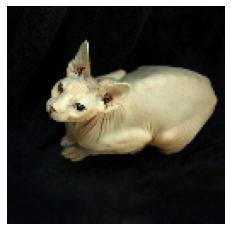

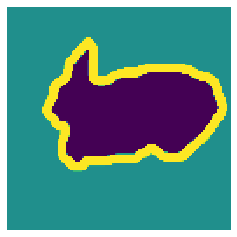

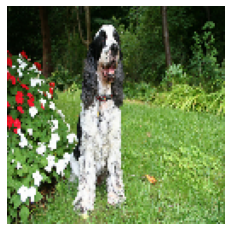

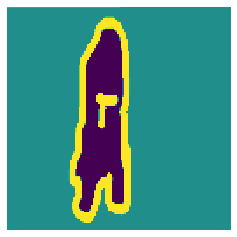

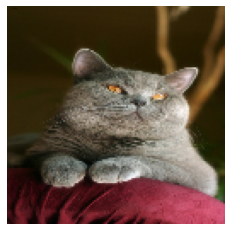

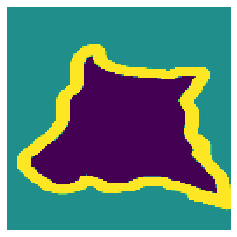

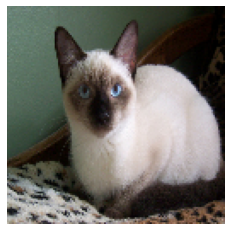

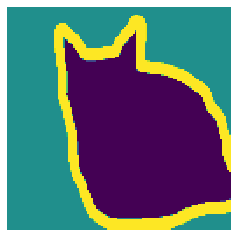

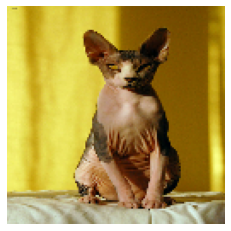

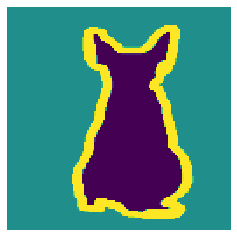

In [ ]:
IMG_SHAPE  = 128
BATCH_SIZE = 32

# Método que procesará las imágenes y máscaras del dataset.
def load_image(datapoint):

  input_image = tf.image.resize(datapoint['image'], (IMG_SHAPE, IMG_SHAPE))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SHAPE, IMG_SHAPE))
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1

  return input_image, input_mask

# Procesamos cada datapoint con el método creado.
train_images = dataset['train'].map(load_image).batch(BATCH_SIZE)
test_images  = dataset['test'].map(load_image).batch(BATCH_SIZE)

# Visualizamos las imágenes cargadas.
for images, masks in train_images.take(1):
  for i in range(5):
    plt.imshow(tf.keras.utils.array_to_img(images[i]))
    plt.axis('off')
    plt.show()
    plt.matshow(tf.keras.utils.array_to_img(masks[i]))
    plt.axis('off')
    plt.show()

In [ ]:
filtersSize=4
kernelSize=5
# Capa de entrada de datos.
inp = Input(shape=(IMG_SHAPE, IMG_SHAPE, 3))

def encoderMiniblock (filtersSize,kernelSize,input):
  enc_1 = Conv2D(filters=filtersSize, kernel_size=kernelSize,  padding="same", activation="relu")(input)
  enc_2 = Conv2D(filters=filtersSize, kernel_size=kernelSize,  padding="same", activation="relu")(enc_1)
  enc_3 = MaxPooling2D()(enc_2)
  return enc_3, enc_2

def encoderMiniblockNoMaxPooling (filtersSize,kernelSize,input):
  enc_1 = Conv2D(filters=filtersSize, kernel_size=kernelSize,  padding="same", activation="relu")(input)
  enc_2 = Conv2D(filters=filtersSize, kernel_size=kernelSize,  padding="same", activation="relu")(enc_1)
  return enc_2

def decoderMiniblock (filtersSize,kernelSize,input,skipConnection):
  dec_1 = Conv2DTranspose(filters=filtersSize, kernel_size=kernelSize, strides=2, padding="same", activation="relu")(input)
  con_1 = concatenate([skipConnection, dec_1])
  dec_2 = Conv2D(filters=filtersSize, kernel_size=kernelSize, padding="same", activation="relu")(con_1)
  dec_3 = Conv2D(filters=filtersSize,  kernel_size=kernelSize, padding="same", activation="relu")(dec_2)
  return dec_3



# Encoder
blockE1 = encoderMiniblock(filtersSize,kernelSize,inp)
blockE2 = encoderMiniblock(filtersSize*2,kernelSize,blockE1[0])
blockE3 = encoderMiniblock(filtersSize*4,kernelSize,blockE2[0])
blockE4 = encoderMiniblock(filtersSize*8,kernelSize,blockE3[0])
blockE5 = encoderMiniblockNoMaxPooling(filtersSize*16,kernelSize,blockE4[0])

# Decoder
blockD1 = decoderMiniblock(filtersSize*8,kernelSize,blockE5,blockE4[1])
blockD2 = decoderMiniblock(filtersSize*4,kernelSize,blockD1,blockE3[1])
blockD3 = decoderMiniblock(filtersSize*2,kernelSize,blockD2,blockE2[1])
blockD4 = decoderMiniblock(filtersSize,kernelSize,blockD3,blockE1[1])

output  = Conv2D(filters=3,  kernel_size=1,  padding="same", activation="softmax")(blockD4)


model = Model(inputs=inp, outputs=output)

early_stop = EarlyStopping(monitor="val_acc", patience=5)

# print(blockE1[1])

model.compile(Adam(), loss=SparseCategoricalCrossentropy(), metrics=["acc"])
model.fit(train_images, validation_data=test_images, epochs=100, callbacks=[early_stop])

Epoch 1/100
115/115 [==============================] - 429s 4s/step - loss: 0.8763 - acc: 0.5832 - val_loss: 0.7869 - val_acc: 0.5868
Epoch 2/100
115/115 [==============================] - 417s 4s/step - loss: 0.7482 - acc: 0.6783 - val_loss: 0.7275 - val_acc: 0.7086
Epoch 3/100
115/115 [==============================] - 413s 4s/step - loss: 0.7084 - acc: 0.7114 - val_loss: 0.7057 - val_acc: 0.7123
Epoch 4/100
115/115 [==============================] - 412s 4s/step - loss: 0.6890 - acc: 0.7170 - val_loss: 0.6791 - val_acc: 0.7209
Epoch 5/100
115/115 [==============================] - 412s 4s/step - loss: 0.6638 - acc: 0.7289 - val_loss: 0.6426 - val_acc: 0.7371
Epoch 6/100
115/115 [==============================] - 412s 4s/step - loss: 0.6224 - acc: 0.7452 - val_loss: 0.5960 - val_acc: 0.7535
Epoch 7/100
115/115 [==============================] - 412s 4s/step - loss: 0.5754 - acc: 0.7617 - val_loss: 0.5797 - val_acc: 0.7578
Epoch 8/100
115/115 [==============================] - 412s 4s

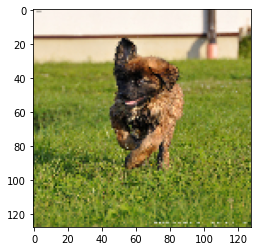

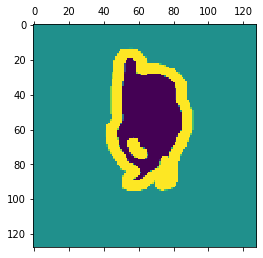

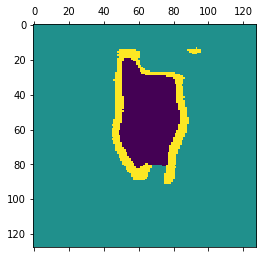

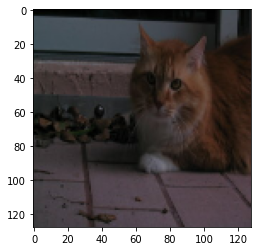

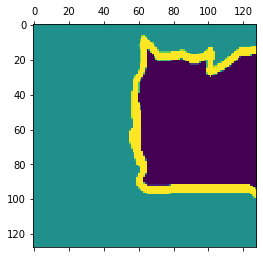

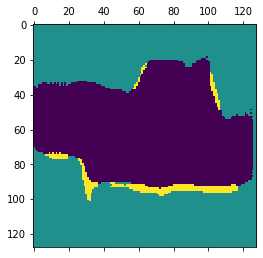

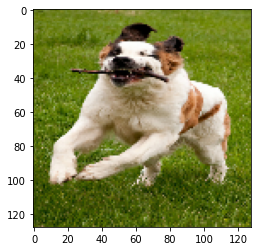

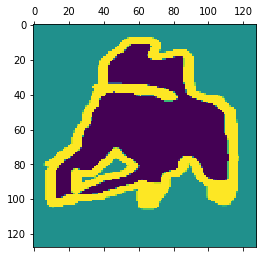

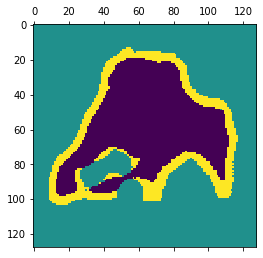

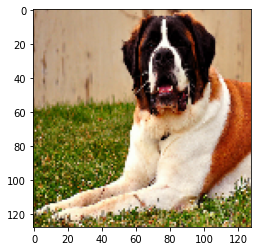

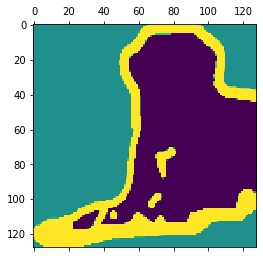

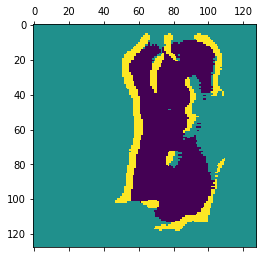

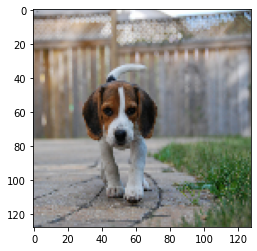

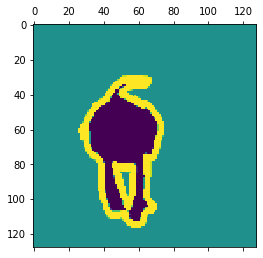

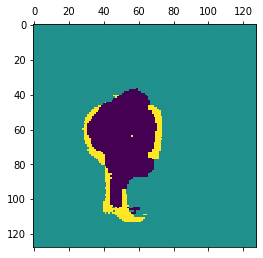

In [ ]:
import numpy as np
# Procesamos cada datapoint con el método creado.
input_images = test_images.take(1)
output_images = model.predict(input_images)

# Visualizamos las imágenes cargadas.
for images, masks in input_images:
  for i in range(5):
    plt.imshow(images[i])
    plt.show()
    plt.matshow(masks[i,:,:,0])
    plt.show()
    plt.matshow(np.argmax(output_images[i], axis=2))
    plt.show()